# Load Data
## multi-class

In [15]:
import pandas as pd

# Load data
data = pd.read_csv('nor_constant_o.csv')
X = data
X = X.drop(
    ['out_num_30_o', 'in_sum_30_o',], axis=1) # 필요없는 피쳐 제외하기
y_mul = pd.read_csv('y_mul.csv').iloc[:, -1]

In [16]:
X.head()

,std_dev_in_o,std_dev_out_o,avg_in_o,avg_out_o,in_pack_sum_o,out_pack_num_o,in_pack_num_o,out_pack_ratio_o,in_pack_ratio_o,total_pack_num_o,...,sum_med_o,std_dev_med_o,avg_med_o,sum_burst_med_o,avg_burst_med_o,std_burst_med_o,in_num_30_o,out_sum_30_o,total_sum_pack_per_sec_o,total_num_pack_per_sec_o
0,0.4325,0.0225,0.6741,0.0419,0.8682,0.0258,0.1318,0.1153,0.8847,0.1379,...,0.0152,0.0597,0.0740,0.0015,0.0143,0.0141,0.6248,0.4615,0.7140,0.2240
1,0.2969,0.0223,0.8333,0.0534,0.9573,0.0166,0.0427,0.2600,0.7400,0.0471,...,0.0083,0.0477,0.0673,0.0005,0.0077,0.0069,0.6248,0.4615,0.7768,0.2082
2,0.4160,0.0192,0.6817,0.0420,0.8744,0.0251,0.1256,0.1195,0.8805,0.1315,...,0.0187,0.0656,0.0969,0.0017,0.0170,0.0155,0.6886,0.4667,0.7758,0.1714
3,0.4341,0.0165,0.6766,0.0398,0.8657,0.0260,0.1343,0.1132,0.8868,0.1404,...,0.0223,0.0980,0.1121,0.0022,0.0212,0.0215,0.6248,0.4615,0.7934,0.1556
4,0.4006,0.0172,0.6811,0.0345,0.8691,0.0245,0.1309,0.1090,0.8910,0.1364,...,0.0171,0.0707,0.0837,0.0017,0.0161,0.0163,0.6248,0.4615,0.7351,0.2040


In [17]:
y_mul.tail()

23995    95
23996    95
23997    95
23998    95
23999    95
Name: y, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_mul, y_test_mul = train_test_split(X, y_mul, test_size=0.2, random_state=1)

## Train the model(RF)

In [19]:
from sklearn.ensemble import RandomForestClassifier

# RF model
model_rf = RandomForestClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200) # best param
model_name = 'RF'

model_rf.fit(X_train, y_train_mul)

RandomForestClassifier(max_depth=30, n_estimators=200)

## Test and evaluate

In [20]:
# Test the trained model using testing data and report the accuracy and confusion matrix.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


y_pred_mul = model_rf.predict(X_test)

result = confusion_matrix(y_test_mul, y_pred_mul)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test_mul, y_pred_mul)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test_mul, y_pred_mul)
print("Accuracy:",result2)

Confusion Matrix:
[[ 23   0   0 ...   0   1   8]
 [  0  20   0 ...   0   0   8]
 [  0   0  31 ...   0   0  10]
 ...
 [  0   0   0 ...  36   0   0]
 [  0   0   0 ...   0  24   7]
 [  1   4   3 ...   0   1 792]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.46      0.55        50
           1       0.67      0.54      0.60        37
           2       0.82      0.67      0.74        46
           3       0.72      0.81      0.76        36
           4       0.71      0.62      0.66        47
           5       0.77      0.88      0.82        34
           6       0.91      0.87      0.89        46
           7       0.81      0.92      0.86        38
           8       0.78      0.78      0.78        36
           9       0.74      0.70      0.72        50
          10       0.97      0.59      0.73        49
          11       0.65      0.57      0.61        35
          12       0.88      0.92      0.90        50
          

## binary classification

In [22]:
from sklearn.model_selection import train_test_split

y_bin = pd.read_csv('y_bin.csv').iloc[:, -1]

X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=1)

## Train the model(RF)

In [23]:
from sklearn.ensemble import RandomForestClassifier

# RF model
model_rf = RandomForestClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200) # best param
model_name = 'RF'

model_rf.fit(X_train, y_train_bin)

RandomForestClassifier(max_depth=30, n_estimators=200)

## Test and evaluate

In [26]:
# Test the trained model using testing data and report the accuracy and confusion matrix.
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score

y_pred_bin = model_rf.predict(X_test)
tpr = recall_score(y_test_bin, y_pred_bin, average='micro')
precision = precision_score(y_test_bin, y_pred_bin, average='micro')
print(f'True Positive Rate: {tpr}')
print(f'False Positive Rate: {1 - tpr}')
print(f'Precision: {precision}')

conf_matrix = confusion_matrix(y_test_bin, y_pred_bin)
print(f"[Confusion Matrix]\n {conf_matrix}")

True Positive Rate: 0.8952083333333334
False Positive Rate: 0.10479166666666662
Precision: 0.8952083333333334
[Confusion Matrix]
 [[ 558  417]
 [  86 3739]]


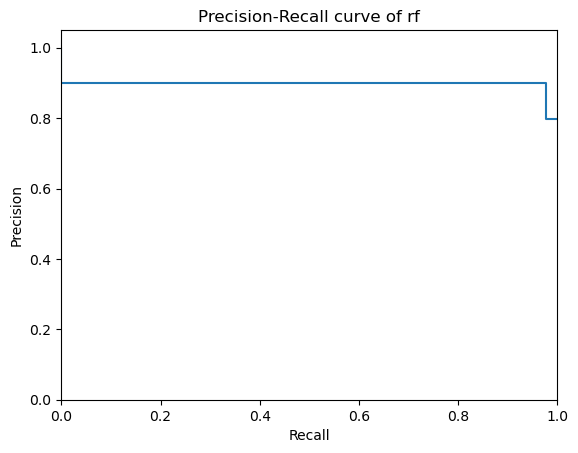

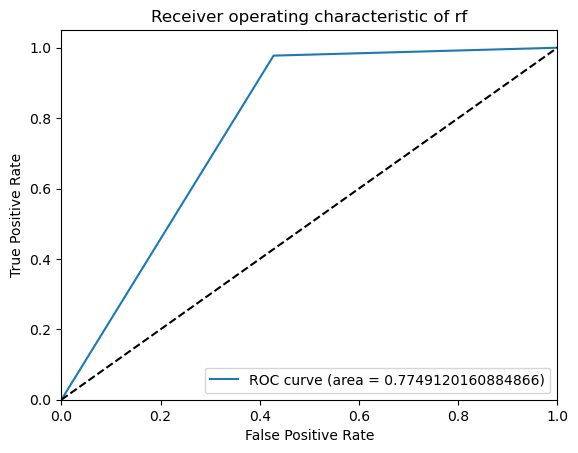

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_bin, y_pred_bin)
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve of rf')
plt.show()

# ROC
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_bin)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver operating characteristic of rf')
plt.legend(loc="lower right")
plt.show()